In [7]:
!git clone https://github.com/WorthyA/titanic_kaggle.git

Cloning into 'titanic_kaggle'...


In [4]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True, sort = False)

In [ ]:
df_train.shape

(891, 12)

Text(0.5, 1.0, 'Missing values heatmap')

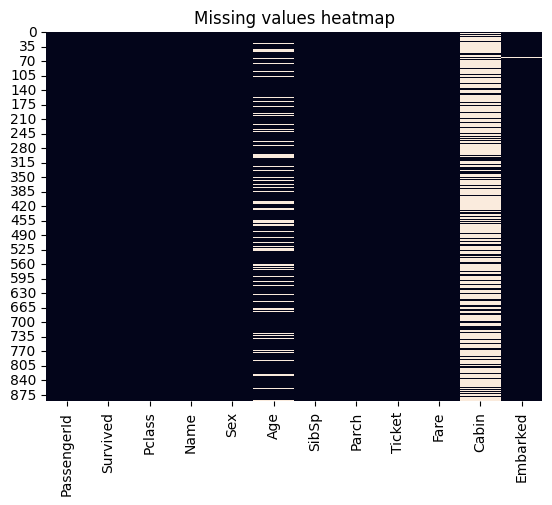

In [ ]:
df_train.isnull().sum()
sns.heatmap(df_train.isnull(), cbar = False).set_title("Missing values heatmap")

In [ ]:
import re

def extract_title(name):
    title = re.search(' ([A-Za-z]+)\.', name)
    if title:
        return title.group(1)
    return ""

df['Title'] = df['Name'].apply(extract_title)

In [ ]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [ ]:
# сначала заполняем пропуски по медиане всего датасета
df['Age'] = df['Age'].fillna(df['Age'].median())

# затем создаем словарь, где ключом будет титул, а значением - медианное значение возраста для данного титула
title_age = df.groupby('Title')['Age'].median().to_dict()

# проходимся по всем строкам и заполняем пропуски в возрасте
for index, row in df.iterrows():
    if pd.isnull(row['Age']):
        if row['Title'] in title_age:
            df.loc[index, 'Age'] = title_age[row['Title']]
        else:
            df.loc[index, 'Age'] = df['Age'].median()

In [ ]:
df['Family'] = df.Parch + df.SibSp

In [ ]:
df['Is_Alone'] = df.Family == 0

In [ ]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [ ]:
df = df.drop(columns = 'Cabin')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family,Is_Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
le_a = LabelEncoder()
df['Is_Alone'] = le_a.fit_transform(df['Is_Alone'])

In [ ]:
df= df.drop(columns = 'Name')

In [ ]:
df= df.drop(columns = 'Title')

In [ ]:
df= df.drop(columns = 'Ticket')

In [ ]:
emb =  pd.get_dummies(df['Embarked'])

In [ ]:
df = pd.concat([df, emb], axis=1)

In [ ]:
df = df.drop(columns = 'Embarked')

In [ ]:
train_df = df.iloc[:891]
test_df = df.iloc[891:]

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Is_Alone,C,Q,S
0,1,0.0,3,1,22.0,1,0,7.2500,1,0,0,0,1
1,2,1.0,1,0,38.0,1,0,71.2833,1,0,1,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,53.1000,1,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,28.0,0,0,8.0500,0,1,0,0,1
1305,1306,NaN,1,0,39.0,0,0,108.9000,0,1,1,0,0
1306,1307,NaN,3,1,38.5,0,0,7.2500,0,1,0,0,1
1307,1308,NaN,3,1,28.0,0,0,8.0500,0,1,0,0,1


In [ ]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Is_Alone,C,Q,S
0,1,0.0,3,1,22.0,1,0,7.2500,1,0,0,0,1
1,2,1.0,1,0,38.0,1,0,71.2833,1,0,1,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,53.1000,1,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,1,27.0,0,0,13.0000,0,1,0,0,1
887,888,1.0,1,0,19.0,0,0,30.0000,0,1,0,0,1
888,889,0.0,3,0,28.0,1,2,23.4500,3,0,0,0,1
889,890,1.0,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
test_df = test_df.drop(columns = 'Survived')


In [ ]:
id_test = test_df['PassengerId']
tt_df = test_df.drop(columns = 'PassengerId')

In [ ]:
tt_df['Fare'] = tt_df["Fare"].fillna(tt_df["Fare"].median())

In [ ]:
X = train_df.drop(columns='Survived' )
y = train_df['Survived']

In [ ]:
X = X.drop(columns = 'PassengerId')

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size=0.2,
                                               random_state=0)
# Инициализация модели SVM
svc = SVC()

# Обучение модели на обучающей выборке
svc.fit(X_train, y_train)

# Предсказание классов на тестовой выборке
y_pred = svc.predict(X_test)

# Вычисление точности предсказания
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7206703910614525


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказание меток классов на тестовых данных
y_pred_r = rf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred_r)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8491620111731844
              precision    recall  f1-score   support

         0.0       0.70      0.95      0.81       110
         1.0       0.81      0.36      0.50        69

    accuracy                           0.72       179
   macro avg       0.75      0.65      0.65       179
weighted avg       0.74      0.72      0.69       179



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
r_tf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
r_tf_model.fit(X, y)

# Предсказание меток классов на тестовых данных
y_pred_rt = r_tf_model.predict(tt_df)



In [ ]:
df_pred = pd.DataFrame(y_pred_rt)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3)
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.8370786516853933
Test accuracy: 0.8156424581005587


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer



# Преобразование данных в формат Dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Определение параметров модели
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Обучение модели
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data], early_stopping_rounds=10)

# Оценка качества модели
y_pred = model.predict(X_test)
y_pred_binary = [int(p >= 0.5) for p in y_pred]
accuracy = sum(y_pred_binary == y_test) / len(y_test)
print("Test accuracy:", accuracy)

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.644102
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.623702
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.605382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.588857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_logloss: 0.574854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's binary_logloss: 0.560304
[LightGBM] [Warning] No fu

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
Rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42, min_samples_split = 2, min_samples_leaf = 2)
Rf_model.fit(X, y)


RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42)

In [ ]:
y_pred_rt = Rf_model.predict(tt_df)

In [ ]:
y_pred_rt

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
result = pd.DataFrame({'PassengerId': df_test.reset_index()['PassengerId'], "Survived": y_pred_rt})

In [ ]:
result['Survived'] = result['Survived'].astype(int)

In [ ]:
result.to_csv('result.csv', index=False)